In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lesson2/training.csv


In [2]:
df = pd.read_csv('/kaggle/input/lesson2/training.csv')
del df['Unnamed: 0']
df

,gender,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,profession,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
0,F,1,0,1,1,1,44,1216.55,Student,56.820000,5.09,6,6
1,M,1,0,1,1,1,58,218.00,Artist,1045.570000,5.23,3,6
2,F,0,0,0,1,1,66,545.09,Retired,235.770000,0.00,0,9
3,M,0,0,0,1,1,35,499.92,Manager,543.144975,0.00,0,6
4,F,0,0,0,1,0,0,59.39,Retired,485.420000,0.00,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256026,F,0,1,0,1,1,56,434.78,Retired,619.885024,0.00,0,5
256027,M,1,1,1,0,1,61,134.10,Retired,466.559493,2.05,3,0
256028,M,0,1,1,1,0,0,926.33,Teacher,1446.570000,3.68,0,3
256029,F,0,0,0,1,1,50,155.37,Retired,264.980000,0.00,0,9


In [3]:
df.describe()

,antivirus,multirum,tv_paket,is_active_jan_2018,is_active_jan_2019,months_active_on_jan_2019,avg_revenue_per_month,gb_incoming_outgoung,tv_hours_per_day,virus_count_per_year,num_of_support_interactions
count,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000
mean,0.601083,0.499209,0.402088,0.949975,0.768094,385.595389,514.083129,681.725715,1.608682,3.617160,4.820947
std,0.489676,0.500000,0.490320,0.217997,0.422050,1844.131347,1275.326103,729.644282,2.060977,4.131541,2.572850
min,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-5000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,19.000000,173.580000,180.680000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,45.000000,459.750000,463.050000,0.000000,2.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,957.315000,925.215000,3.690000,7.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10310.180000,12960.510000,8.090000,12.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256031 entries, 0 to 256030
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gender                       226383 non-null  object 
 1   antivirus                    256031 non-null  int64  
 2   multirum                     256031 non-null  int64  
 3   tv_paket                     256031 non-null  int64  
 4   is_active_jan_2018           256031 non-null  int64  
 5   is_active_jan_2019           256031 non-null  int64  
 6   months_active_on_jan_2019    256031 non-null  int64  
 7   avg_revenue_per_month        256031 non-null  float64
 8   profession                   256031 non-null  object 
 9   gb_incoming_outgoung         256031 non-null  float64
 10  tv_hours_per_day             256031 non-null  float64
 11  virus_count_per_year         256031 non-null  int64  
 12  num_of_support_interactions  256031 non-null  int64  
dtyp

We see that [antivirus, multirum, tv_paket, is_active_jan_2018, is_active_jan_2019] have only 0 and 1.

We also don't have columns with identical values in all rows, because we don't have std 0 anywhere.

We see that [months_active_on_jan_2019, avg_revenue_per_month, gb_incoming_outgoung] have outliers because std differs significantly from mean.

Plus, you can't really have -999 months and 10000 months because that would mean a client used internet for a thousand years. We can't have 12960 gb for the same money other people have 100 gb for. We can't have -5000 revenue or 10000 revenue for the same services other people pay 1000.

We see that only [gender] has NaNs. So let's treat outliers, use a machinle learning model to predict NaNs in [gender] and do the analysis.

Four methods are used to find outliers, and each method applies to a certain type of data:

Normally distributed data - Z-score.

Skewed data - Interquartile range (IQR).

High-dimensional data - Isolation Forest, LOF.

Known expected range - Percentile method.

Known expected range doesn't seem to be applicable here.

High-dimensional data is when there are more rows than columns, not applicable here.

But Isolation Forest and LOF could also be used to detect outliers.

However, our dataset has outliers and so the data is skewed because of that.

Let's visualize outliers, treat them, and then take a look at data distribution.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


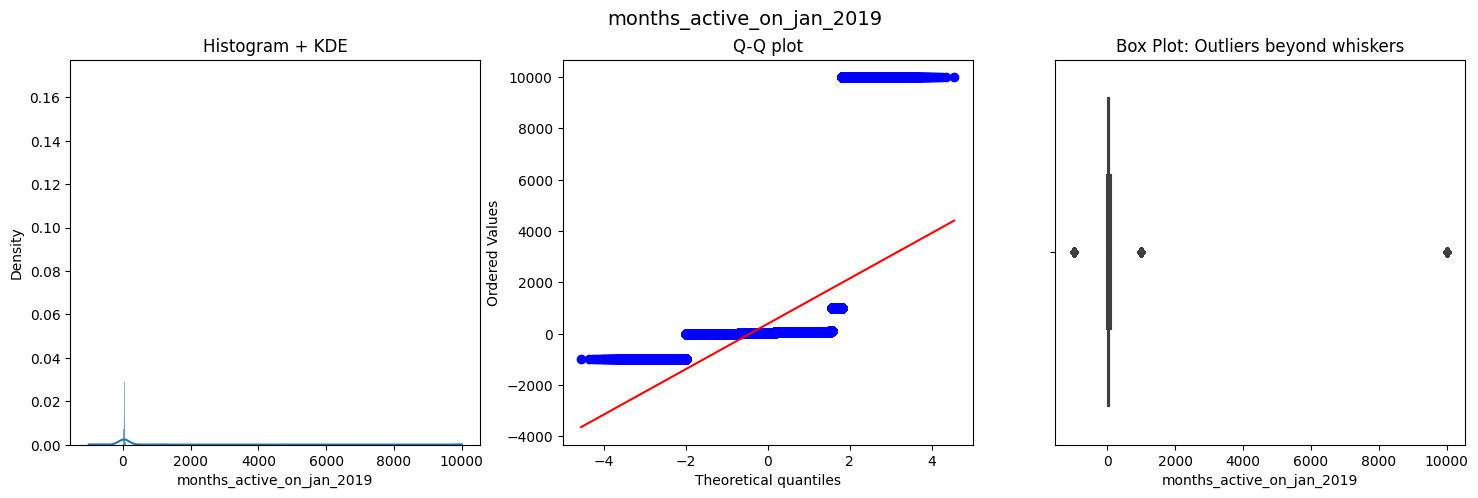

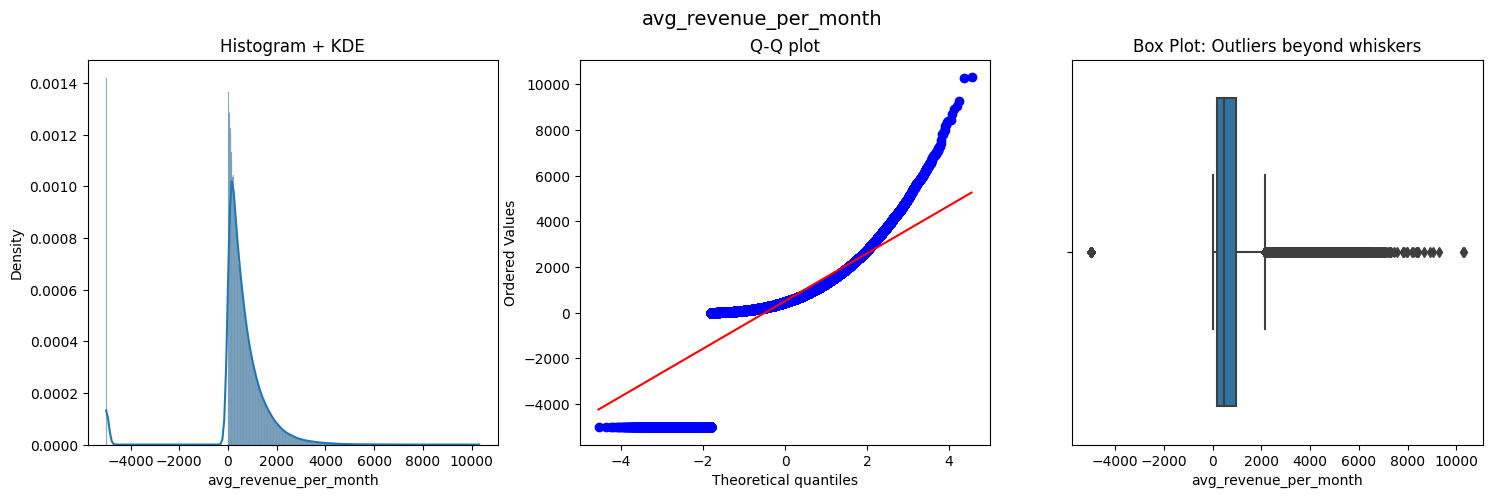

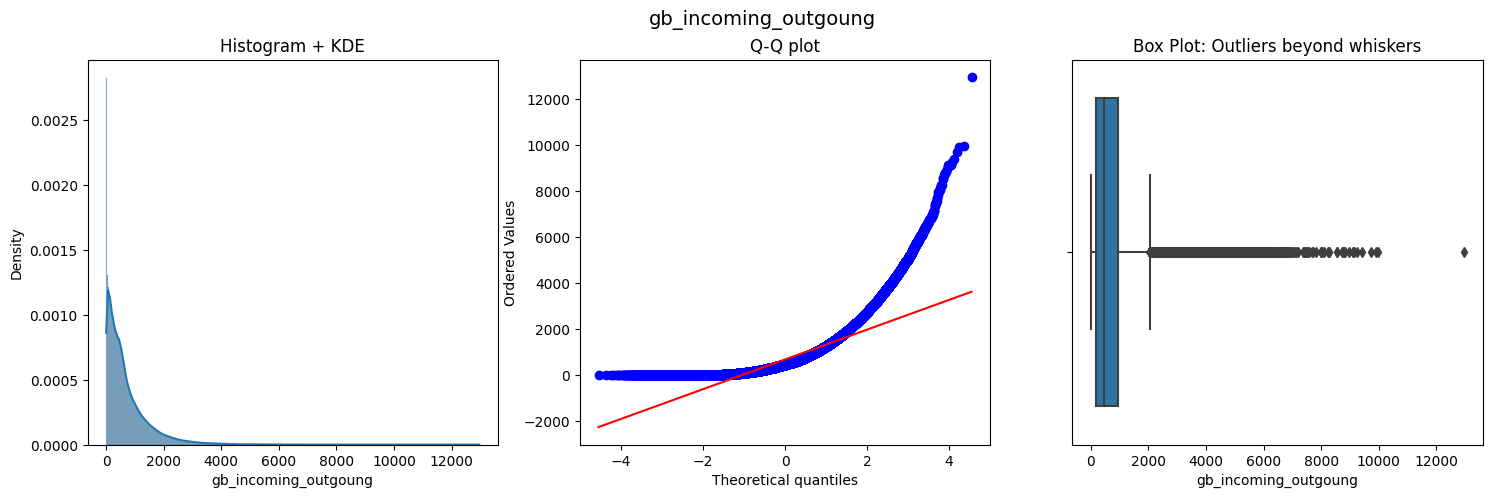

In [5]:
#Visualize outliers:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
for col in df[['months_active_on_jan_2019', 'avg_revenue_per_month', 'gb_incoming_outgoung']]:
    fig, axes = plt.subplots(1, 3, figsize = (18, 5))
    fig.suptitle(f"{col}", fontsize = 14)
    sns.histplot(df[col], kde = True, ax = axes[0], stat = 'density')
    axes[0].set_title("Histogram + KDE")
    stats.probplot(df[col], dist = 'norm', plot = axes[1])
    axes[1].set_title("Q-Q plot")
    sns.boxplot(x = df[col], ax = axes[2])
    axes[2].set_title("Box Plot: Outliers beyond whiskers")

In [6]:
#Before getting rid of outliers, let's take a closer look at months:
for i in range(-1000, 10001, 100):
    count = ((df.months_active_on_jan_2019 >= i) & (df.months_active_on_jan_2019 < i + 100)).sum()
    print(f"Values between {i} and {i+100} occur {count} times.")

Values between -1000 and -900 occur 6020 times.
Values between -900 and -800 occur 0 times.
Values between -800 and -700 occur 0 times.
Values between -700 and -600 occur 0 times.
Values between -600 and -500 occur 0 times.
Values between -500 and -400 occur 0 times.
Values between -400 and -300 occur 0 times.
Values between -300 and -200 occur 0 times.
Values between -200 and -100 occur 0 times.
Values between -100 and 0 occur 68 times.
Values between 0 and 100 occur 234694 times.
Values between 100 and 200 occur 87 times.
Values between 200 and 300 occur 0 times.
Values between 300 and 400 occur 0 times.
Values between 400 and 500 occur 0 times.
Values between 500 and 600 occur 0 times.
Values between 600 and 700 occur 0 times.
Values between 700 and 800 occur 0 times.
Values between 800 and 900 occur 0 times.
Values between 900 and 1000 occur 6201 times.
Values between 1000 and 1100 occur 0 times.
Values between 1100 and 1200 occur 0 times.
Values between 1200 and 1300 occur 0 times

Here we see that:

Values between -1000 and -900 occur 6020 times - which cannot be true.

Values between -100 and 0 occur 68 times - which cannot be true.

Values between 0 and 100 occur 234694 times - which could be true.

Values between 100 and 200 occur 87 times - which could be true to a degree. I think the valid range is 0-120 months, which corresponds to 0 to 10 years. I need a closer look at 100-200 range.

Values between 900 and 1000 occur 6201 times - which cannot be true.

Values between 10000 and 10100 occur 8961 times - which cannot be true.

In [7]:
#take a closer look at 100-200 range:
for i in range(100, 201, 10):
    count = ((df.months_active_on_jan_2019 >= i) & (df.months_active_on_jan_2019 < i + 10)).sum()
    print(f"Values between {i} and {i+10} occured {count} times.")

Values between 100 and 110 occured 79 times.
Values between 110 and 120 occured 8 times.
Values between 120 and 130 occured 0 times.
Values between 130 and 140 occured 0 times.
Values between 140 and 150 occured 0 times.
Values between 150 and 160 occured 0 times.
Values between 160 and 170 occured 0 times.
Values between 170 and 180 occured 0 times.
Values between 180 and 190 occured 0 times.
Values between 190 and 200 occured 0 times.
Values between 200 and 210 occured 0 times.


We see that valid range for [months_active_on_jan_2019] is indeed 0-120 months.

Let's get rid of outliers.

For [months_active_on_jan_2019] we impute with median every value outside of 0-120 range.

For [avg_revenue_per_month, gb_incoming_outgoung] we'll use IQR, because it's a very skewed data.

In [8]:
#replace values outside 0-120 range with nan:
df.months_active_on_jan_2019 = np.where((df.months_active_on_jan_2019 < 0) | (df.months_active_on_jan_2019 > 120),
                                        np.nan, df.months_active_on_jan_2019)

In [9]:
#control that outliers are replaced with nan:
df.months_active_on_jan_2019.isna().sum()

21250

In [10]:
#replace nans with outliers:
df.months_active_on_jan_2019 = df.months_active_on_jan_2019.fillna(df.months_active_on_jan_2019.median())

In [11]:
#control that nans are replaced with outliers:
df.months_active_on_jan_2019.describe()

count    256031.000000
mean         38.545543
std          23.706102
min           0.000000
25%          25.000000
50%          44.000000
75%          55.000000
max         119.000000
Name: months_active_on_jan_2019, dtype: float64

<Axes: xlabel='months_active_on_jan_2019'>

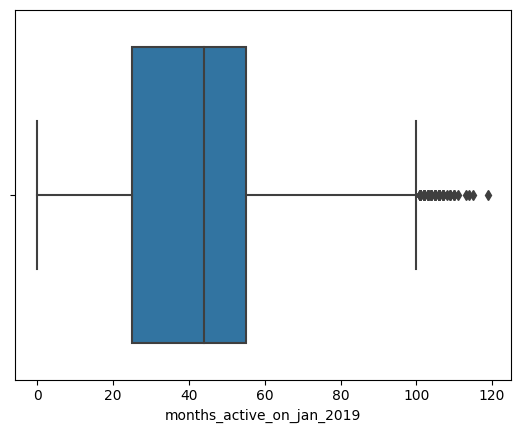

In [12]:
#visual control of df.months_active_on_jan_2019:
sns.boxplot(x = df.months_active_on_jan_2019)

In [13]:
#control that outliers are replaced:
tot = 0
for i in range(0, 121, 10):
    count = ((df.months_active_on_jan_2019 >= i) & (df.months_active_on_jan_2019 < i + 10)).sum()
    tot += count
    print(f"Values between {i} and {i+10} occured {count} times, and total is {tot}.")

Values between 0 and 10 occured 55062 times, and total is 55062.
Values between 10 and 20 occured 3374 times, and total is 58436.
Values between 20 and 30 occured 12404 times, and total is 70840.
Values between 30 and 40 occured 29262 times, and total is 100102.
Values between 40 and 50 occured 65705 times, and total is 165807.
Values between 50 and 60 occured 44562 times, and total is 210369.
Values between 60 and 70 occured 29134 times, and total is 239503.
Values between 70 and 80 occured 12298 times, and total is 251801.
Values between 80 and 90 occured 3515 times, and total is 255316.
Values between 90 and 100 occured 628 times, and total is 255944.
Values between 100 and 110 occured 79 times, and total is 256023.
Values between 110 and 120 occured 8 times, and total is 256031.
Values between 120 and 130 occured 0 times, and total is 256031.


In [14]:
df[['avg_revenue_per_month', 'gb_incoming_outgoung']].describe()

,avg_revenue_per_month,gb_incoming_outgoung
count,256031.000000,256031.000000
mean,514.083129,681.725715
std,1275.326103,729.644282
min,-5000.000000,0.000000
25%,173.580000,180.680000
50%,459.750000,463.050000
75%,957.315000,925.215000
max,10310.180000,12960.510000


In [15]:
for col in df[['avg_revenue_per_month', 'gb_incoming_outgoung']]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l = q1 - 1.5 * iqr
    u = q3 + 1.5 * iqr
    df[col] = np.where( (df[col] < l) | (df[col] > u), np.nan, df[col] )

In [16]:
df[['avg_revenue_per_month', 'gb_incoming_outgoung']].describe()

,avg_revenue_per_month,gb_incoming_outgoung
count,234189.000000,241767.000000
mean,592.927717,554.570627
std,505.745358,482.637660
min,0.000000,0.000000
25%,186.400000,167.690000
50%,449.050000,429.190000
75%,877.100000,814.130000
max,2132.810000,2041.920000


In [17]:
for col in df[['avg_revenue_per_month', 'gb_incoming_outgoung']]:
    df[col] = df[col].fillna(df[col].median())

In [18]:
df[['avg_revenue_per_month', 'gb_incoming_outgoung']].describe()

,avg_revenue_per_month,gb_incoming_outgoung
count,256031.000000,256031.000000
mean,580.653512,547.585421
std,485.358804,469.881448
min,0.000000,0.000000
25%,207.245000,180.680000
50%,449.050000,429.190000
75%,823.930000,781.080000
max,2132.810000,2041.920000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


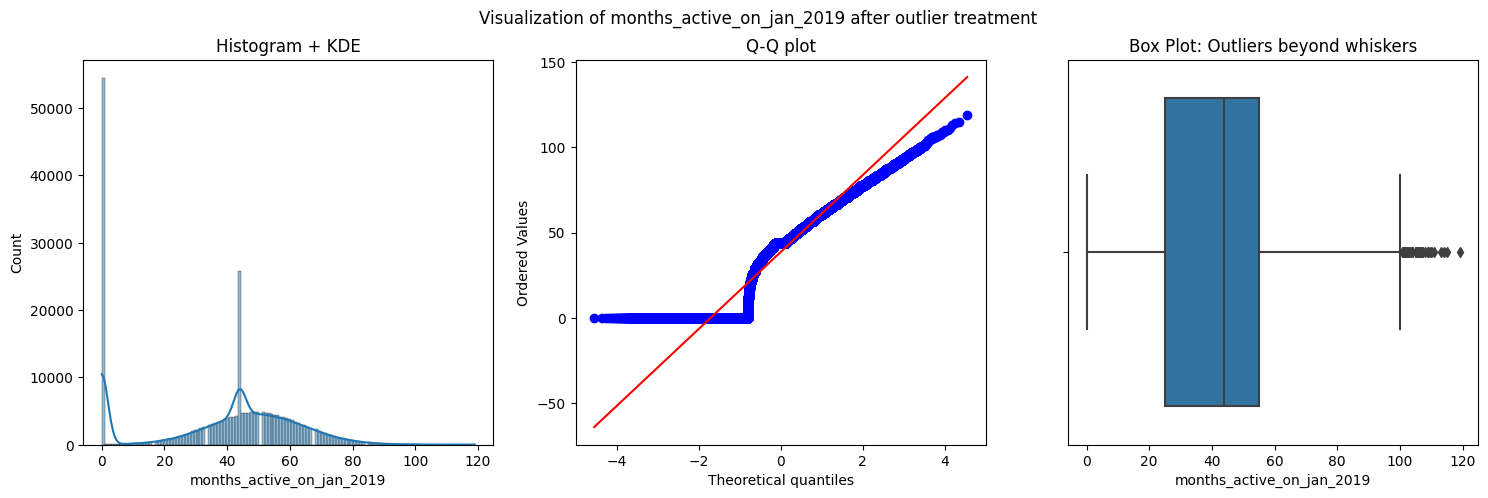

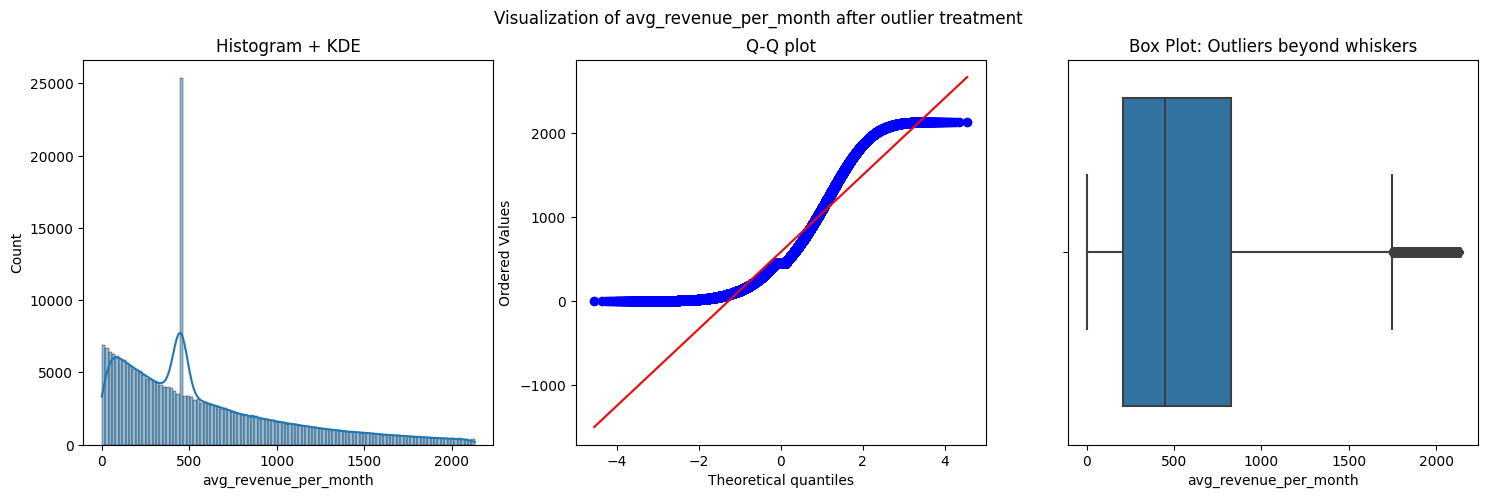

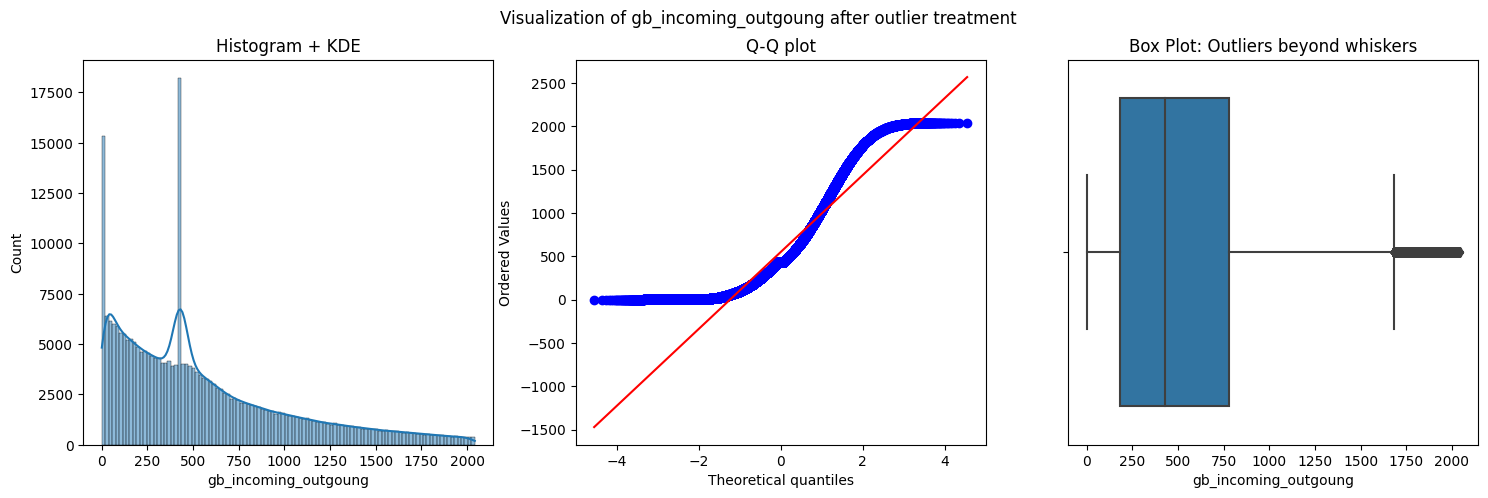

In [19]:
#Visual control after outlier treatment:
for col in df[['months_active_on_jan_2019', 'avg_revenue_per_month', 'gb_incoming_outgoung']]:
    fig, axes = plt.subplots(1, 3, figsize = (18, 5))
    fig.suptitle(f"Visualization of {col} after outlier treatment", fontsize = 12)
    sns.histplot(df[col], kde = True, ax = axes[0], stat = 'count')
    axes[0].set_title("Histogram + KDE")
    stats.probplot(df[col], dist = 'norm', plot = axes[1])
    axes[1].set_title('Q-Q plot')
    sns.boxplot(x = df[col], ax = axes[2])
    axes[2].set_title("Box Plot: Outliers beyond whiskers")

This data does look comparatively better.
Now, let's predict values for gender and do the analysis.

<Axes: xlabel='gender'>

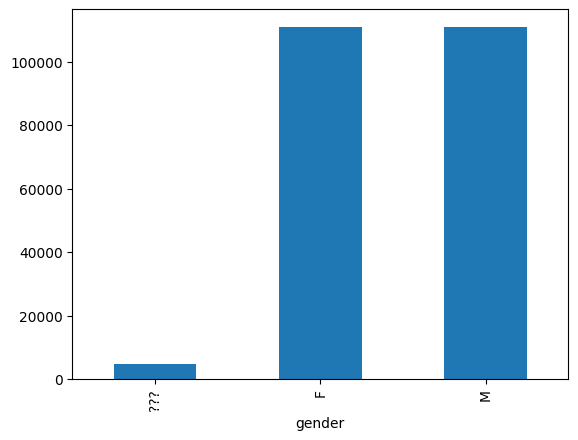

In [20]:
#Visualize gender:
df.gender.value_counts(ascending = True).plot.bar()

In [21]:
df.gender.value_counts()

gender
M      110934
F      110825
???      4624
Name: count, dtype: int64

In [22]:
df.gender.unique()

array(['F', 'M', nan, '???'], dtype=object)

So gender has errors in the form of "???" and missing values.

First, replace errors with missing values.

In [23]:
#Replace errors with nan:
df.gender = np.where(df.gender.isin(['M', 'F']), df.gender, np.nan)

In [24]:
df.gender.unique()

array(['F', 'M', nan], dtype=object)

In [25]:
df.gender.value_counts()

gender
M    110934
F    110825
Name: count, dtype: int64

In [26]:
df.gender.isna().sum()

34272

Errors are replaced, it's time to train the model to predict missing values M and F

In [27]:
#checking for empty rows before training model:
for col in df:
    count = df[col].isnull().sum()
    print(f"{col} has              {count} empty rows")

gender has              34272 empty rows
antivirus has              0 empty rows
multirum has              0 empty rows
tv_paket has              0 empty rows
is_active_jan_2018 has              0 empty rows
is_active_jan_2019 has              0 empty rows
months_active_on_jan_2019 has              0 empty rows
avg_revenue_per_month has              0 empty rows
profession has              0 empty rows
gb_incoming_outgoung has              0 empty rows
tv_hours_per_day has              0 empty rows
virus_count_per_year has              0 empty rows
num_of_support_interactions has              0 empty rows


In [28]:
#I train LogisticRegression model to predict gender

#Prepare the data
train_df = df[df.gender.isin(['M', 'F'])]
#Separate features(X) and target(y):
X = train_df.drop(columns = ['gender'])
y = train_df['gender']
#Preprocess the data:
X = pd.get_dummies(X, drop_first = True)
#Split data into training and validation set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Train the model:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#Evaluate the model:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49594155844155846
              precision    recall  f1-score   support

           F       0.50      0.41      0.45     22239
           M       0.50      0.58      0.54     22113

    accuracy                           0.50     44352
   macro avg       0.50      0.50      0.49     44352
weighted avg       0.50      0.50      0.49     44352



And we see that the accuracy is 0.49, which means the model doesn't work.

Probably, because other values don't predict gender in this dataset.

To confirm this, I run a test for correlation between gender and other values:

In [30]:
correl = train_df.select_dtypes(include = 'number').corrwith(train_df['gender'].map({'F': 0, 'M': 1}))
print(correl.sort_values(ascending = False))

tv_hours_per_day               0.003310
tv_paket                       0.002872
num_of_support_interactions    0.001500
virus_count_per_year           0.000691
is_active_jan_2019             0.000068
avg_revenue_per_month         -0.000006
antivirus                     -0.000161
multirum                      -0.000283
gb_incoming_outgoung          -0.001594
months_active_on_jan_2019     -0.002549
is_active_jan_2018            -0.003671
dtype: float64


Yep, there is no correlation. 1 is strong positive, -1 is strong negative, but we have 0.

Training a model was sort of useless, but it's already done so I will replace nans with predicted values.

In [31]:
#Identify rows needing prediction:
predict_df = df[df['gender'].isna() |~df['gender'].isin(['F', 'M'])]
#preprocess these rows:
X_predict = pd.get_dummies(predict_df.drop(columns = ['gender']), drop_first = True)
X_predict = X_predict.reindex(columns = X.columns, fill_value = 0)
#Predict and update df:
predictions = model.predict(X_predict)
df.loc[predict_df.index, 'gender'] = predictions

In [32]:
df.gender.value_counts()

gender
M    130915
F    125116
Name: count, dtype: int64

Now it's time to do the actual analysis. Let's find out what makes revenue high and what makes it low.

In [33]:
#encode object columns in numbers:
obj = ['gender', 'profession']
edf = pd.get_dummies(df, columns = obj, drop_first = True)

In [34]:
#find correlations between revenue and other values:
from scipy.stats import pearsonr
correlations = []
for col in edf:
    corr, p_value = pearsonr(edf[col], edf['avg_revenue_per_month'])
    correlations.append({
        'Feature': col,
        'Correlation': corr,
        'P_value': p_value,
        'ABS_corr': abs(corr)
    })
res = pd.DataFrame(correlations).sort_values('ABS_corr', ascending = False)
res

,Feature,Correlation,P_value,ABS_corr
6,avg_revenue_per_month,1.000000,0.000000e+00,1.000000
0,antivirus,0.070132,1.686577e-276,0.070132
1,multirum,0.069575,3.809494e-272,0.069575
2,tv_paket,0.067170,9.263062e-254,0.067170
8,tv_hours_per_day,0.063545,2.785625e-227,0.063545
9,virus_count_per_year,0.050516,2.752843e-144,0.050516
10,num_of_support_interactions,-0.038151,4.315644e-83,0.038151
4,is_active_jan_2019,0.022731,1.272775e-30,0.022731
5,months_active_on_jan_2019,0.019083,4.598488e-22,0.019083
7,gb_incoming_outgoung,0.009839,6.410525e-07,0.009839


We find that correlations are weak.

In general, antivirus tops the list of revenue drivers. It's followed by multirum, tv, tv_hours.

The number of support interactions predicts lesser revenue. Other correlations are so weak that they are negligible.

It seems, I need to split this data on above 1000 and below 1000 and analyze them separately.

Because from this dataset it is impossible to understand what drives standard revenue and what drives high revenue.

In [35]:
#split edf in below 1000 and above:
edfb = edf[edf['avg_revenue_per_month'] <= 1000]
edfa = edf[edf['avg_revenue_per_month'] > 1000]

In [36]:
#analyze edf below 1000:
from scipy.stats import pearsonr
correlations_below_1000 = []
for col in edfb:
    corr, p_value = pearsonr(edfb[col], edfb['avg_revenue_per_month'])
    correlations_below_1000.append({
        'Features': col,
        'Correlation': corr,
        'P_value': p_value,
        'ABS_corr': abs(corr)
    })
res = pd.DataFrame(correlations_below_1000).sort_values('ABS_corr', ascending = False)
res

,Features,Correlation,P_value,ABS_corr
6,avg_revenue_per_month,1.000000,0.000000e+00,1.000000
0,antivirus,0.048155,2.427318e-107,0.048155
1,multirum,0.046572,1.619662e-100,0.046572
2,tv_paket,0.046449,5.335982e-100,0.046449
8,tv_hours_per_day,0.044371,2.069398e-91,0.044371
9,virus_count_per_year,0.035130,5.633680e-58,0.035130
10,num_of_support_interactions,-0.024762,1.144927e-29,0.024762
4,is_active_jan_2019,0.016354,8.009331e-14,0.016354
5,months_active_on_jan_2019,0.012511,1.099766e-08,0.012511
11,gender_M,-0.005521,1.168085e-02,0.005521


We see that for revenue below 1000 the overall picture is the same, and in fact, correlations are even weaker.

In [37]:
#analyze edf above 1000:
from scipy.stats import pearsonr
correlations_above_1000 = []
for col in edfa:
    corr, p_value = pearsonr(edfa[col], edfa['avg_revenue_per_month'])
    correlations_above_1000.append({
        'Feature': col,
        'Correlation': corr,
        'P_value': p_value,
        'ABS_corr': abs(corr)
    })
res = pd.DataFrame(correlations_above_1000).sort_values('ABS_corr', ascending = False)
res

,Feature,Correlation,P_value,ABS_corr
6,avg_revenue_per_month,1.000000,0.000000e+00,1.000000
1,multirum,0.051746,1.771888e-29,0.051746
2,tv_paket,0.051044,9.966631e-29,0.051044
8,tv_hours_per_day,0.048436,4.994241e-26,0.048436
0,antivirus,0.039967,3.176113e-18,0.039967
9,virus_count_per_year,0.031859,3.973352e-12,0.031859
10,num_of_support_interactions,-0.022338,1.149760e-06,0.022338
4,is_active_jan_2019,0.014428,1.681444e-03,0.014428
5,months_active_on_jan_2019,0.011348,1.348174e-02,0.011348
17,profession_Student,0.007023,1.262306e-01,0.007023


For revenue above 1000 the picture is the same, only multirum tops the list.

The possible reason is that the data is non-linear and monotonic/non-monotonic.

That means, the applied Pearsonr method is wrong here.

Looking at histplot of revenue and gb, I see that values decrease consistently, suggesting monotonic data.

Let's run a test for non-linear, monotonic data.

In [38]:
#Run a test for non-linear, monotonic data:
from scipy.stats import spearmanr
t = 'avg_revenue_per_month'
r = []
for col in edf:
    if col != t:
        rho, p = spearmanr(edf[col], edf[t])
        r.append({
            'Feature': col,
            'Spearman_p': rho,
            'P_value': p,
            'Monotonic': abs(rho) > 0.7 and p < 0.05
        })
res = pd.DataFrame(r).sort_values('Spearman_p', ascending = False)
res

,Feature,Spearman_p,P_value,Monotonic
0,antivirus,0.071906,1.376069e-290,False
1,multirum,0.070183,6.671157e-277,False
2,tv_paket,0.067555,1.160731e-256,False
7,tv_hours_per_day,0.064066,5.368597e-231,False
8,virus_count_per_year,0.058995,3.885112e-196,False
4,is_active_jan_2019,0.023275,5.030259e-32,False
5,months_active_on_jan_2019,0.016511,6.555483e-17,False
6,gb_incoming_outgoung,0.009250,2.863857e-06,False
16,profession_Student,0.002368,2.308694e-01,False
12,profession_Doctor,0.001022,6.051363e-01,False


No monotonic data found, although that is strange because I see on histplots that data is monotonic. I probably do something wrong.

Let's try the last thing - Feature Importance by Random Forest Regressor.

Feature Importance answers which feature matters most.

In [39]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256031 entries, 0 to 256030
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   antivirus                    256031 non-null  int64  
 1   multirum                     256031 non-null  int64  
 2   tv_paket                     256031 non-null  int64  
 3   is_active_jan_2018           256031 non-null  int64  
 4   is_active_jan_2019           256031 non-null  int64  
 5   months_active_on_jan_2019    256031 non-null  float64
 6   avg_revenue_per_month        256031 non-null  float64
 7   gb_incoming_outgoung         256031 non-null  float64
 8   tv_hours_per_day             256031 non-null  float64
 9   virus_count_per_year         256031 non-null  int64  
 10  num_of_support_interactions  256031 non-null  int64  
 11  gender_M                     256031 non-null  bool   
 12  profession_Developer         256031 non-null  bool   
 13 

In [40]:
#train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
X = edf.drop(columns = ['avg_revenue_per_month'])
y = edf['avg_revenue_per_month']
bool_cols = X.select_dtypes(include = 'bool').columns
X[bool_cols] = X[bool_cols].astype(int)
model = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1)
model.fit(X, y)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_,
}).sort_values('Importance', ascending = False)
print(importance.head(10))

                        Feature  Importance
6          gb_incoming_outgoung    0.379812
5     months_active_on_jan_2019    0.164001
7              tv_hours_per_day    0.112716
9   num_of_support_interactions    0.107150
8          virus_count_per_year    0.076283
10                     gender_M    0.031069
14           profession_Manager    0.023104
15           profession_Retired    0.022910
16           profession_Student    0.013049
3            is_active_jan_2018    0.011652


Finally, we confirmed that gb_incoming_outgoung is a main revenue driver.

<Axes: xlabel='Importance', ylabel='Feature'>

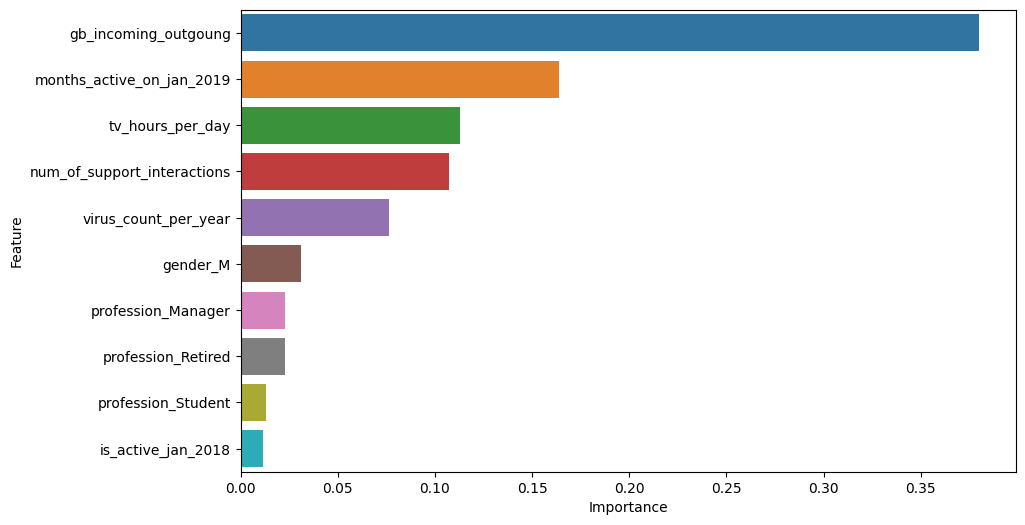

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = importance.head(10))